In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub  
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [29]:
# Load data from CSV file into a DataFrame
df = pd.read_csv('IMDB Dataset.csv')  # Replace 'your_data.csv' with your actual file name
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [42]:
# Split the data into training, validation, and test sets
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=0)
temp_data = temp_data.iloc[:, :-1]  # Exclude the last column from temp_data
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=0)

In [45]:
# Extract texts and labels
texts = [sample[0] for sample in data]
labels = [sample[1] for sample in data]
print(texts)

TypeError: string indices must be integers

In [44]:
# Create a vocabulary and tokenization
vocab_size = 50  # Just for demonstration
tokenizer = tf.keras.layers.TextVectorization(max_tokens=vocab_size)
tokenizer.adapt(texts)

# Convert text to tokenized sequences
sequences = tokenizer(texts)
print(sequences)

# Pad sequences to a fixed length
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)

# Create the LSTM model
model = Sequential([
    Embedding(vocab_size, 16),
    LSTM(16),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to numerical format
label_to_id = {'positive': 1, 'negative': 0}
for label in labels:
    try:
        numeric_label = label_to_id[label]
        numeric_labels.append(numeric_label)
    except KeyError:
        print(f"Label '{label}' not found in label_to_id dictionary.")

tf.Tensor(
[[3]
 [2]], shape=(2, 1), dtype=int64)
Label 'e' not found in label_to_id dictionary.
Label 'e' not found in label_to_id dictionary.


In [ ]:
#Wnumeric_labels = np.array([label_to_id[label] for label in labels])

model.fit(padded_sequences, numeric_labels, epochs=100)

# Save the trained model
model.save('text_classifier_model')

# Load the trained model
loaded_model = tf.keras.models.load_model('text_classifier_model')

In [24]:
# Test a single string!!
test_string = "I believe this product is amazing!!!"
test_sequence = tokenizer([test_string])
padded_test_sequence = tf.keras.preprocessing.sequence.pad_sequences(test_sequence)
tf.get_logger().setLevel('ERROR')

# Predict sentiment
prediction = loaded_model.predict(padded_test_sequence)[0][0]

# Convert prediction to sentiment label
sentiment_label = 'positive' if prediction > 0.5 else 'negative'

# Print results
print(f"Test String: {test_string}")
print(f"Predicted Sentiment: {sentiment_label} (Confidence: {prediction:.4f})")


1/1 [==============================] - 0s 236ms/step
Test String: I believe this product is amazing!!!
Predicted Sentiment: positive (Confidence: 0.5916)


1/1 [==============================] - 0s 240ms/step


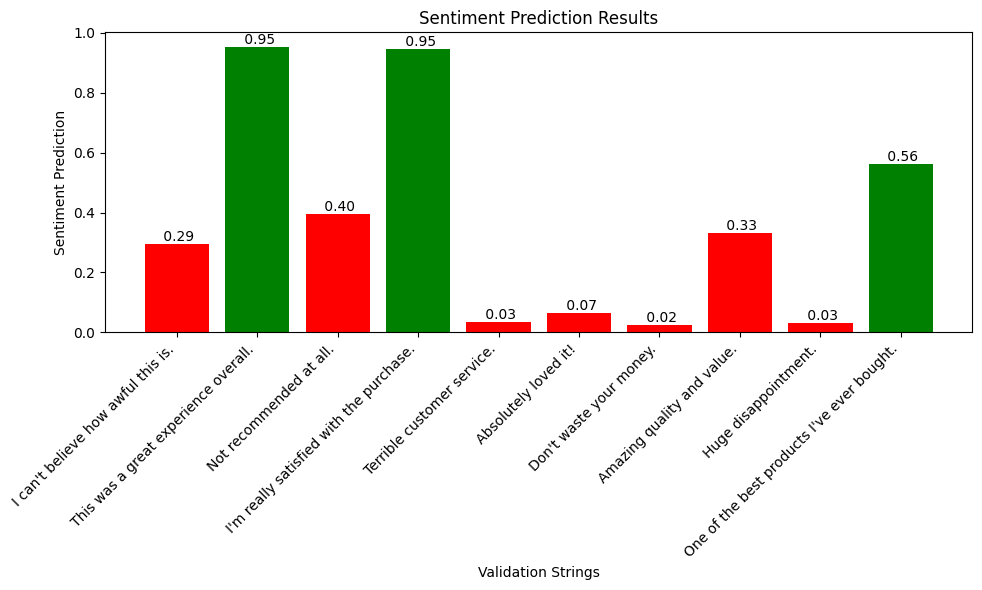

In [25]:
import matplotlib.pyplot as plt

# Tokenize and pad validation data
validation_sequences = tokenizer(validation_data)
padded_validation_sequences = tf.keras.preprocessing.sequence.pad_sequences(validation_sequences)

# Predict sentiment for validation strings
validation_predictions = loaded_model.predict(padded_validation_sequences)
validation_sentiments = ['positive' if pred > 0.5 else 'negative' for pred in validation_predictions]

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(validation_data, validation_predictions.flatten(), color=['green' if sent == 'positive' else 'red' for sent in validation_sentiments])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Validation Strings')
plt.ylabel('Sentiment Prediction')
plt.title('Sentiment Prediction Results')
plt.tight_layout()

# Add text labels on top of the bars
for i, pred in enumerate(validation_predictions):
    plt.text(i, pred + 0.01, f" {pred[0]:.2f}", ha="center", color='black')

plt.show()
